# Imports

In [1]:
import pandas as pd
import numpy as np

cleaned_data_path = "datas/cleanedData.csv"
labels_data_path = "datas/labels.csv"

cleaned_data = pd.read_csv(cleaned_data_path)
labels_data = pd.read_csv(labels_data_path)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix , f1_score, recall_score, precision_score

x_train, x_test, y_train, y_test = train_test_split(cleaned_data.drop(columns=["Attrition", "EmployeeID"], axis=1), labels_data["Attrition"], test_size=0.3, shuffle=True)

from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier(random_state=42)
tree_reg.fit(x_train, y_train)

a = cross_val_predict(tree_reg, x_train, y_train, cv=100)

print(a)

print(confusion_matrix(y_train, a))

print(recall_score(y_train, a))

print(precision_score(y_train, a))

print(f1_score(y_train, a))



[0 1 0 ... 1 0 0]
[[2439   70]
 [  60  441]]
0.8802395209580839
0.863013698630137
0.8715415019762847


In [20]:
from sklearn.metrics import mean_squared_error

tree_reg_test_predictions = tree_reg.predict(x_test)
tree_reg_train_predictions = tree_reg.predict(x_train)

print(confusion_matrix(y_test, tree_reg_test_predictions))

print(recall_score(y_test, tree_reg_test_predictions))

print(precision_score(y_test, tree_reg_test_predictions))

print(f1_score(y_test, tree_reg_test_predictions))

tree_mse = mean_squared_error(y_test, tree_reg_test_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

[[1057   39]
 [  28  166]]
0.8556701030927835
0.8097560975609757
0.8320802005012532


0.22789906646610913

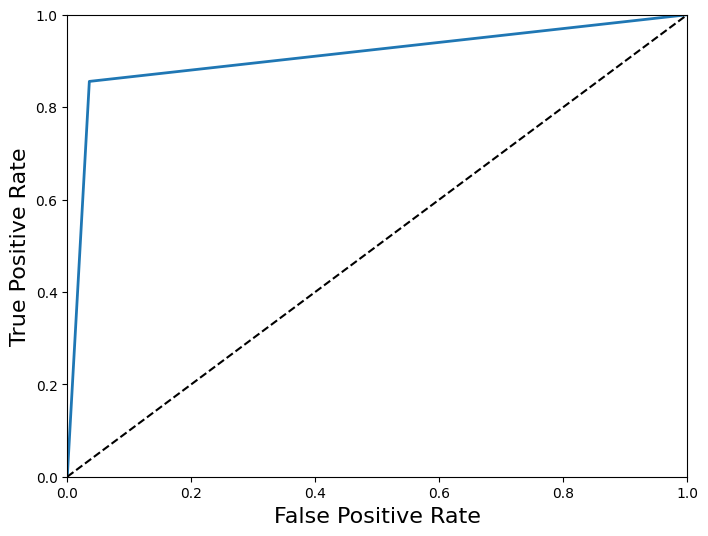

In [21]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


fpr, tpr, thresholds = roc_curve(y_test, tree_reg_test_predictions)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show() 